In [266]:
# Unit 5 - Financial Planning

In [267]:
# Part 1 - Personal Finance Planner

# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [268]:
# Load .env enviroment variables
load_dotenv()

True

In [269]:
# Part 1 - Personal Finance Planner
# Collect Crypto Prices Using the requests Library

In [270]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [271]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


In [272]:
# GET data from urls 

btc_response = requests.get(btc_url).json()
eth_response = requests.get(eth_url).json()

In [279]:
# Fetch current BTC price

btc_response

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18824456,
   'total_supply': 18824456,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 44910.0,
     'volume_24h': 33100934835,
     'market_cap': 846908782227,
     'percentage_change_1h': -0.243311338550364,
     'percentage_change_24h': 3.36443693153876,
     'percentage_change_7d': -6.20271104749852,
     'percent_change_1h': -0.243311338550364,
     'percent_change_24h': 3.36443693153876,
     'percent_change_7d': -6.20271104749852},
    'CAD': {'price': 57363.543,
     'volume_24h': 42279824064.7455,
     'market_cap': 1081756587538.55,
     'percent_change_1h': -0.243311338550364,
     'percent_change_24h': 3.36443693153876,
     'percent_change_7d': -6.20271104749852}},
   'last_updated': 1632443929}},
 'metadata': {'timestamp': 1632443929,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [274]:
# Verify output of BTC price in CAD

btc_price = btc_response['data']['1']['quotes']['CAD']['price']
btc_price

57363.543

In [280]:
# Fetch current ETH price

eth_response

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 117647959,
   'total_supply': 117647959,
   'max_supply': 0,
   'quotes': {'USD': {'price': 3146.42,
     'volume_24h': 19253158105,
     'market_cap': 371681653192,
     'percentage_change_1h': -0.188697906214248,
     'percentage_change_24h': 2.39575757419952,
     'percentage_change_7d': -11.9466855760966,
     'percent_change_1h': -0.188697906214248,
     'percent_change_24h': 2.39575757419952,
     'percent_change_7d': -11.9466855760966},
    'CAD': {'price': 4018.922266,
     'volume_24h': 24592058847.5165,
     'market_cap': 474748975622.142,
     'percent_change_1h': -0.188697906214248,
     'percent_change_24h': 2.39575757419952,
     'percent_change_7d': -11.9466855760966}},
   'last_updated': 1632443941}},
 'metadata': {'timestamp': 1632443941,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [281]:
# Verify output of ETH price in CAD

eth_price = eth_response["data"]["1027"]["quotes"]["CAD"]["price"]
eth_price

4018.922266

In [282]:
# Compute current value of my crpto

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price


# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $68836.25
The current value of your 5.3 ETH is $21300.29


In [283]:
# Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)


In [284]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [285]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [286]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")




In [287]:
 # Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [288]:
# Create the Alpaca API object

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)



In [289]:
# Format current date as ISO format
today = pd.Timestamp.today().isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df

# Preview DataFrame
df_portfolio

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-10-04 00:00:00-04:00  109.56  109.570  109.4100  109.500  2130907   
2017-10-05 00:00:00-04:00  109.54  109.540  109.3701  109.440  1586971   
2017-10-06 00:00:00-04:00  109.22  109.420  109.1499  109.290  1587251   
2017-10-09 00:00:00-04:00  109.35  109.420  109.3146  109.400  1000706   
2017-10-10 00:00:00-04:00  109.47  109.610  109.3999  109.430  1502645   
...                           ...      ...       ...      ...      ...   
2021-09-17 00:00:00-04:00  115.80  115.875  115.7428  115.850  4662040   
2021-09-20 00:00:00-04:00  116.02  116.170  115.9750  116.120  4463038   
2021-09-21 00:00:00-04:00  116.13  116.170  116.0450  116.135  4455403   
2021-09-22 00:00:00-04:00  116.11  116.250  116.0050  116.190  6079965   
2021-09-23 00:00:00-04:00  115.93  115.940  115.5700  115.570  7516613   

                              SPY                                      
                             open    high      low   close     volume  
time                                                                   
2017-10-04 00:00:00-04:00  252.69  253.44  252.560  253.16   30217246  
2017-10-05 00:00:00-04:00  253.51  254.68  253.400  254.64   45350955  
2017-10-06 00:00:00-04:00  254.15  254.46  253.850  254.40   40706912  
2017-10-09 00:00:00-04:00  254.63  254.70  253.650  253.96   23554888  
2017-10-10 00:00:00-04:00  254.62  255.05  253.980  254.60   28248210  
...                           ...     ...      ...     ...        ...  
2021-09-17 00:00:00-04:00  444.92  445.37  441.020  441.41  100861596  
2021-09-20 00:00:00-04:00  434.88  436.56  428.860  434.07  149948277  
2021-09-21 00:00:00-04:00  436.53  437.91  433.070  433.67   82418070  
2021-09-22 00:00:00-04:00  436.05  440.03  433.747  437.83   91135278  
2021-09-23 00:00:00-04:00  439.84  444.89  439.600  443.13   67408294  

[1000 rows x 10 columns]

In [290]:
# Pick AGG and SPY close prices

# Calculate the current value in dollars of the stock portfolio
# Fetch the current closing prices from the DataFrame



## PLEASE NOTE: THE BELOW COMMAND PICKS UP THE CURRENT PRICE (OF THE CURRENT DATE) FOR THE TICKER

agg_close_price = float(df_portfolio["AGG"]["close"][-1])
spy_close_price = float(df_portfolio["SPY"]["close"][-1])

# PRINT THE CURRENT PRICE
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.57
Current SPY closing price: $443.13


In [291]:
# Compute the current value of shares

my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22156.50
The current value of your 200 AGG shares is $23114.00


In [292]:
## Savings Health Analysis

In [293]:
# Set monthly household income

monthly_income = 12000

# Consolidate financial assets data

crypto_total = my_btc_value + my_eth_value
shares_total = my_spy_value + my_agg_value

In [294]:
# Create savings DataFrame

# Set total amount for each asset class

amount_data = {
    "amount": [(crypto_total), (shares_total)]
}

# Set asset class names

asset_class = ["crypto", "shares"]

# Create DataFrame with `asset class` as index

df_savings = pd.DataFrame(amount_data, index=asset_class)

# Display savings DataFrame

display(df_savings)

,amount
crypto,90136.53961
shares,45270.50000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

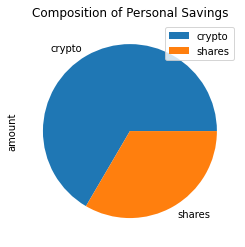

In [295]:
# Plot savings pie chart

df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [296]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_total + shares_total


In [297]:
# Validate saving health

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"Unfortunately, you are ${(emergency_fund - total_savings):0.2f} away from reaching your goal.")


Congratulations! You have enough money in your emergency fund.


In [298]:
# Part 2 - Retirement Planning

In [299]:
# Monte Carlo Simulation

# Set start and end dates of five years back from today.
# Today's Date is September 23, 2021.

start_date = pd.Timestamp('2016-09-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-23', tz='America/New_York').isoformat()


In [300]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-10-03 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-10-04 00:00:00-04:00  252.69  253.44  252.56  253.16  30217246.0  
2017-10-05 00:00:00-04:00  253.51  254.68  253.40  254.64  45350955.0  
2017-10-06 00:00:00-04:00  254.15  254.46  253.85  254.40  40706912.0  
2017-10-09 00:00:00-04:00  254.63  254.70  253.65  253.96  23554888.0

In [301]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# The portfolio allocation is a 40/60 split bond/equity

MC_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_portfolio.portfolio_data.head()   

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-03 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-10-04 00:00:00-04:00    -0.000183  252.69  253.44  252.56  253.16   
2017-10-05 00:00:00-04:00    -0.000548  253.51  254.68  253.40  254.64   
2017-10-06 00:00:00-04:00    -0.001371  254.15  254.46  253.85  254.40   
2017-10-09 00:00:00-04:00     0.001006  254.63  254.70  253.65  253.96   

                                                    
                               volume daily_return  
time                                                
2017-10-03 00:00:00-04:00         NaN          NaN  
2017-10-04 00:00:00-04:00  30217246.0          NaN  
2017-10-05 00:00:00-04:00  45350955.0     0.005846  
2017-10-06 00:00:00-04:00  40706912.0    -0.000943  
2017-10-09 00:00:00-04:00  23554888.0    -0.001730

In [302]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

## PLEASE NOTE: As per Monte Carlo simulation below, I keep getting a Performance Warning message at the "Number 100" mark. This (cont'd)
## warning does impact the forecasting numbers but on a relative basis.(cont'd)
## I reached out for assistance 4 times - twice via AskBCS, once with my Teacher Assistant and also with my Class Instructor (cont'd) -
## but to no avail. No one was able to assist in correcting this Performance Warning message.  My Instructor said to make a note of this (cont'd)
## in a cell so you can be aware of the issue. Thank you.

MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/roshpanesar/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996971,0.991183,1.003975,1.002207,0.995181,1.000854,1.008489,1.012265,0.990855,1.009283,...,0.993091,1.007491,0.997364,1.011723,0.997416,0.996497,0.998074,1.003758,0.994517,1.004320
2,0.995550,1.005243,1.006114,1.007420,0.997694,0.993305,1.017661,1.007279,0.990802,1.006860,...,0.981613,0.997965,0.997581,1.004281,1.000523,0.987362,0.992392,1.019640,0.996950,0.994984
3,1.001559,1.002213,1.011668,1.003517,1.000971,0.980884,1.022522,1.010436,0.980170,1.012549,...,0.981637,1.010194,1.001670,1.004081,1.012707,0.981006,0.987001,1.019968,0.992164,0.992297
4,0.997376,0.990372,1.014888,1.002310,0.993360,0.988173,1.029485,1.012906,0.973642,1.015648,...,0.979541,1.009880,1.002517,1.012246,1.013504,0.983838,0.983918,1.003188,0.984708,1.008950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,62.164448,38.881820,13.991255,28.766943,25.090198,34.046325,31.714583,7.200888,25.165489,16.032941,...,8.775634,17.448331,17.882385,46.776988,13.358780,8.744878,18.062985,68.057510,26.181151,14.960592
7557,62.474642,39.405355,14.047950,29.020851,24.907476,34.005126,31.728804,7.252221,25.228067,15.840079,...,8.805014,17.549377,17.989503,46.339833,13.223160,8.765518,18.174929,68.256079,26.270322,15.064857
7558,62.194404,38.807408,14.089010,28.705001,24.811186,34.361196,31.790395,7.237883,25.484219,15.778147,...,8.746056,17.443317,18.256490,46.832322,13.316637,8.850433,18.402138,67.354157,26.341174,14.896677
7559,62.450823,38.159132,14.071047,28.641693,24.828755,34.038168,32.102375,7.207404,25.312856,15.960685,...,8.809227,17.356277,18.636739,47.228354,13.426596,8.953964,18.463005,67.001874,26.276890,14.841075


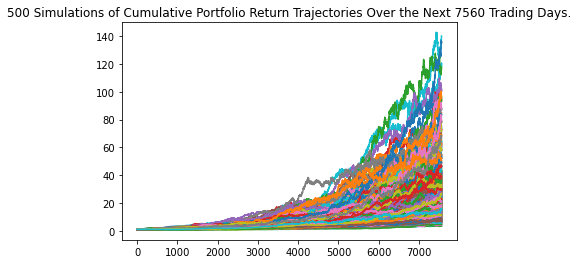

In [303]:
# Plot simulation outcomes

line_plot = MC_portfolio.plot_simulation()

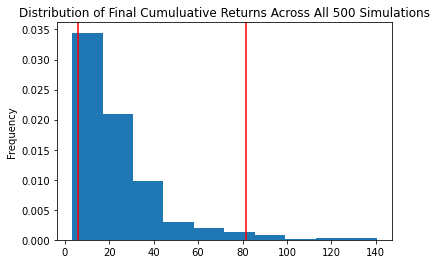

In [304]:
# Plot probability distribution and confidence intervals

dist_plot = MC_portfolio.plot_distribution()

In [305]:
##  Retirement Analysis

# Fetch summary statistics from the Monte Carlo simulation results

portfolio_tbl = MC_portfolio.summarize_cumulative_return()

# Print summary statistics

print(portfolio_tbl)

count           500.000000
mean             24.028931
std              19.817199
min               3.354412
25%              11.292203
50%              17.940417
75%              30.132419
max             140.305555
95% CI Lower      5.997888
95% CI Upper     81.461072
Name: 7560, dtype: float64


In [306]:
#  Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(portfolio_tbl[8]*20000,2)
ci_upper = round(portfolio_tbl[9]*20000,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $119957.76 and $1629221.45


In [307]:
#  Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(portfolio_tbl[8]*30000,2)
ci_upper = round(portfolio_tbl[9]*30000,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $179936.64 and $2443832.17


In [308]:
##  Optional Challenge - Early Retirement

In [310]:
# Option 1 - Five Years Retirement Option - Assume initial investment is $100,000 with 40/60 income/equity split.

# PORTFOLIO RECOMMENDATION - retiring in 5 years; recommend same 40/60 spilt allocation with initial investment of $100,000.
# It is too risky to increase equity allocation as there might be a market correction within the next 5 years and not enough time to recuperate
# the losses. Let's forecast what the lower and upper ranges of the portfolio will look like five years from now at a 95% confidence interval.

In [311]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with a 40/60 split bond/equity allocation


MC_five_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data
    
MC_five_portfolio.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-03 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-10-04 00:00:00-04:00    -0.000183  252.69  253.44  252.56  253.16   
2017-10-05 00:00:00-04:00    -0.000548  253.51  254.68  253.40  254.64   
2017-10-06 00:00:00-04:00    -0.001371  254.15  254.46  253.85  254.40   
2017-10-09 00:00:00-04:00     0.001006  254.63  254.70  253.65  253.96   

                                                    
                               volume daily_return  
time                                                
2017-10-03 00:00:00-04:00         NaN          NaN  
2017-10-04 00:00:00-04:00  30217246.0          NaN  
2017-10-05 00:00:00-04:00  45350955.0     0.005846  
2017-10-06 00:00:00-04:00  40706912.0    -0.000943  
2017-10-09 00:00:00-04:00  23554888.0    -0.001730

In [312]:
MC_five_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/roshpanesar/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002813,0.991881,1.006544,0.992421,1.002599,0.992845,1.003224,0.999740,0.988022,1.009836,...,1.018747,1.013329,0.991113,1.012730,1.002831,1.002478,1.001834,0.988853,1.002463,1.010205
2,0.985165,0.987769,1.021046,0.990615,1.000935,0.988838,0.998841,1.011884,0.995844,1.019770,...,1.004502,1.019927,0.993318,0.996298,1.024494,0.995827,1.001019,0.997062,0.999352,1.006162
3,0.989041,0.993074,1.013310,0.996461,0.997289,0.976826,1.002452,1.004093,0.995356,1.019985,...,1.007154,1.013523,0.990992,1.008164,1.016786,0.990410,1.012496,1.001277,0.996618,0.997808
4,0.994648,0.989181,1.008962,0.998322,1.017199,0.986284,1.010508,1.005280,0.995075,1.027574,...,1.004687,1.024942,0.989532,0.998138,1.018291,0.988505,1.009731,0.995345,1.000428,1.005105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.439928,2.031835,1.909729,1.429237,1.422228,1.197205,1.081242,1.744900,1.160669,2.279804,...,1.271599,2.238011,1.731556,1.438319,1.073406,2.638708,1.081303,1.766106,1.885432,1.695380
1257,1.441840,2.029175,1.895642,1.433402,1.415292,1.193009,1.061535,1.737243,1.168832,2.296022,...,1.282453,2.215335,1.725604,1.451622,1.081905,2.651996,1.088684,1.749453,1.885198,1.706490
1258,1.440033,2.036813,1.892878,1.438450,1.435021,1.186024,1.066064,1.725931,1.181451,2.331365,...,1.274448,2.221080,1.738276,1.453190,1.088957,2.652520,1.081068,1.778259,1.876902,1.706829
1259,1.436284,2.009977,1.889866,1.452401,1.429858,1.210268,1.072982,1.712119,1.172377,2.330582,...,1.270259,2.224527,1.737709,1.477558,1.083108,2.679642,1.086196,1.773791,1.881214,1.703986


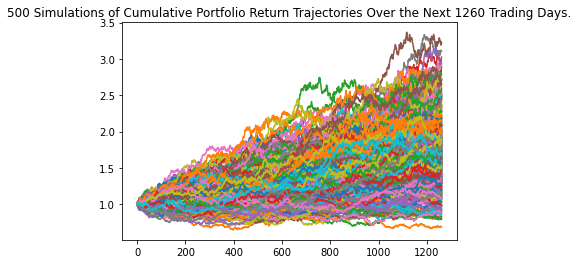

In [313]:
# Plot simulation outcomes

five_line_plot = MC_five_portfolio.plot_simulation()

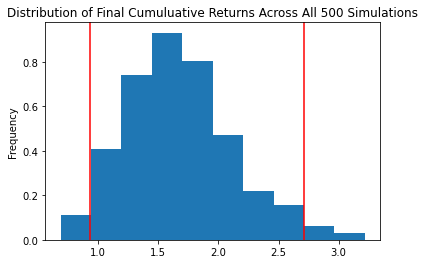

In [314]:
# Plot probability distribution and confidence intervals

five_dist_plot = MC_five_portfolio.plot_distribution()

In [315]:
##  Retirement Analysis - 5 years

# Fetch summary statistics from the Monte Carlo simulation results

portfolio_five_tbl = MC_five_portfolio.summarize_cumulative_return()

# Print summary statistics

print(portfolio_five_tbl)

count           500.000000
mean              1.683638
std               0.443556
min               0.685818
25%               1.368248
50%               1.648601
75%               1.929754
max               3.218838
95% CI Lower      0.931016
95% CI Upper      2.709606
Name: 1260, dtype: float64


In [316]:
#  Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $100,000 initial investment.

# Set initial investment
five_initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000

ci_five_lower = round(portfolio_five_tbl[8]*100000,2)
ci_five_upper = round(portfolio_five_tbl[9]*100000,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${five_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_five_lower} and ${ci_five_upper}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $93101.56 and $270960.56


In [317]:
# Option 2 - Ten Years Retirement Option - Assume initial investment is $50,000 with 20/80 income/equity split.

# PORTFOLIO RECOMMENDATION - retiring in 10 years; recommend a more aggressive allocation with 20/80 income/equity split. 
# If there's a market correction, a ten year timeframe can be enough time to recover any losses.
# Let's forecast what the lower and upper ranges of the portfolio will look like ten years from now at a 95% confidence interval.

In [318]:
# Configure a Monte Carlo simulation to forecast ten years cumulative returns with a 20/80 split bond/equity allocation

MC_ten_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Print the simulation input data
    
MC_ten_portfolio.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-10-03 00:00:00-04:00  109.46  109.54  109.4000  109.52  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.57  109.4100  109.50  2130907.0   
2017-10-05 00:00:00-04:00  109.54  109.54  109.3701  109.44  1586971.0   
2017-10-06 00:00:00-04:00  109.22  109.42  109.1499  109.29  1587251.0   
2017-10-09 00:00:00-04:00  109.35  109.42  109.3146  109.40  1000706.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-10-03 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-10-04 00:00:00-04:00    -0.000183  252.69  253.44  252.56  253.16   
2017-10-05 00:00:00-04:00    -0.000548  253.51  254.68  253.40  254.64   
2017-10-06 00:00:00-04:00    -0.001371  254.15  254.46  253.85  254.40   
2017-10-09 00:00:00-04:00     0.001006  254.63  254.70  253.65  253.96   

                                                    
                               volume daily_return  
time                                                
2017-10-03 00:00:00-04:00         NaN          NaN  
2017-10-04 00:00:00-04:00  30217246.0          NaN  
2017-10-05 00:00:00-04:00  45350955.0     0.005846  
2017-10-06 00:00:00-04:00  40706912.0    -0.000943  
2017-10-09 00:00:00-04:00  23554888.0    -0.001730

In [319]:
MC_ten_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/roshpanesar/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990888,1.005532,0.983605,0.997277,0.974438,0.997366,1.001874,0.999393,1.002526,1.001279,...,0.986410,0.989948,1.005990,0.993689,0.978783,0.999609,1.010190,1.006636,0.996842,0.997795
2,0.986288,1.013181,0.977039,0.996074,0.988712,0.997140,1.005662,0.992393,1.007379,1.002094,...,0.990783,0.990354,1.023649,0.988382,0.963607,0.995394,1.010359,1.003119,0.997422,0.995436
3,0.987917,1.004352,0.986004,0.998816,1.002874,1.006097,1.006444,0.987456,1.008210,0.980852,...,0.990071,0.988817,1.025832,0.993152,0.949885,1.010293,1.004104,1.015133,0.997819,0.998319
4,0.985477,0.999623,0.987715,0.995331,0.994641,1.005436,1.008624,0.987542,1.002170,0.987966,...,1.002088,0.996866,1.009899,0.991472,0.938995,1.017656,1.009405,1.028539,0.996652,0.990115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.280668,5.480451,5.543144,5.712537,4.281761,9.606597,2.009205,3.509936,3.180667,3.183325,...,8.423438,2.407167,2.465869,4.013207,1.327597,2.971134,3.214410,4.179689,4.024245,2.185681
2517,2.271419,5.499564,5.462010,5.705010,4.305141,9.564960,2.033830,3.487628,3.185947,3.189977,...,8.406308,2.431096,2.469042,4.056828,1.323258,2.910953,3.227703,4.147541,3.994723,2.195942
2518,2.248217,5.510366,5.449617,5.747180,4.274781,9.552158,2.020732,3.430015,3.150717,3.251228,...,8.363685,2.401249,2.501444,4.011190,1.334664,2.886381,3.258096,4.161185,3.960970,2.195337
2519,2.278489,5.508775,5.342769,5.829160,4.262198,9.577679,2.048308,3.377595,3.113813,3.258140,...,8.464048,2.437694,2.477990,4.006423,1.328159,2.850088,3.246027,4.099063,3.972944,2.204750


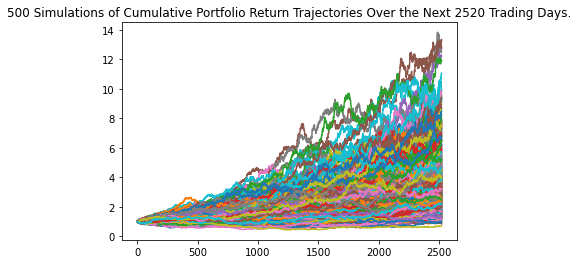

In [320]:
# Plot simulation outcomes

ten_line_plot = MC_ten_portfolio.plot_simulation()

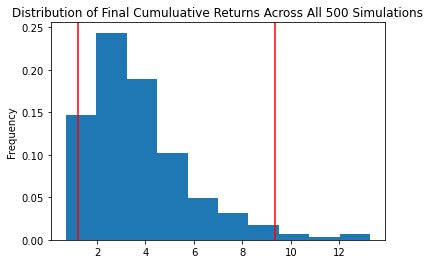

In [321]:
#  Plot probability distribution and confidence intervals

ten_dist_plot = MC_ten_portfolio.plot_distribution()

In [322]:
##  Retirement Analysis - 10 years

# Fetch summary statistics from the Monte Carlo simulation results

portfolio_ten_tbl = MC_ten_portfolio.summarize_cumulative_return()

# Print summary statistics

print(portfolio_ten_tbl)

count           500.000000
mean              3.737328
std               2.105781
min               0.713600
25%               2.179454
50%               3.252503
75%               4.650129
max              13.264280
95% CI Lower      1.206214
95% CI Upper      9.356412
Name: 2520, dtype: float64


In [324]:
#  Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $50,000 initial investment.

# Set initial investment
ten_initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $50,000

ci_ten_lower = round(portfolio_ten_tbl[8]*50000,2)
ci_ten_upper = round(portfolio_ten_tbl[9]*50000,2)

# Print results

print(f"There is a 95% chance that an initial investment of ${ten_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_ten_lower} and ${ci_ten_upper}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $60310.71 and $467820.6
